# Customers’ Preferences 

## Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import AgglomerativeClustering
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score, classification_report, confusion_matrix
import scipy.cluster.hierarchy as sch

## Load & Inspect Data

In [2]:
# Load data
df = pd.read_excel("StoresData.xlsx", sheet_name="Stores-Data")

# Display first 5 rows
df.head()

,Store No.,Sales $m,Wages $m,No. Staff,Location,Loc'n (Num),State,State (Num),Age (Yrs),GrossProfit,...,Mng-Sex (Num),Mng-Age,Mng-Exp,Mng-Train,Union%,Car Spaces,HomeDel,HomeDel (Num),Basket:2013,Basket:2014
0,1,12.5,2.3,60,Mall,2,NSW,1,10,0.712,...,0,33,12,2,38,46,Del:No,0,171,178
1,2,14.5,2.7,69,Mall,2,Vic,2,8,0.091,...,0,33,16,1,38,73,Del:No,0,168,178
2,3,19.0,3.1,79,Country,3,Vic,2,7,1.075,...,0,30,9,2,39,64,Del:No,0,180,188
3,4,18.2,2.6,66,Mall,2,Qld,3,7,1.372,...,0,29,9,2,38,66,Del:Yes,1,173,180
4,5,7.6,2.0,51,Strip,1,Qld,3,15,2.148,...,0,36,4,3,40,29,Del:No,0,166,171


**From the last results, We know now the structur of our dataset and its features.**

**We have many redundent columns bceause many columns are encoded already so we will drop the categorical columns.**

**Then we will display a small brief about the dataset features and a summary statistics for numerical attributes.**

In [3]:
# Display data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Store No.      150 non-null    int64  
 1   Sales $m       150 non-null    float64
 2   Wages $m       150 non-null    float64
 3   No. Staff      150 non-null    int64  
 4   Location       150 non-null    object 
 5   Loc'n (Num)    150 non-null    int64  
 6   State          150 non-null    object 
 7   State (Num)    150 non-null    int64  
 8   Age (Yrs)      150 non-null    int64  
 9   GrossProfit    150 non-null    float64
 10  Adv.$'000      150 non-null    int64  
 11  Competitors    150 non-null    int64  
 12  HrsTrading     150 non-null    int64  
 13  Sundays        150 non-null    object 
 14  Sundays (Num)  150 non-null    int64  
 15  Mng-Sex        150 non-null    object 
 16  Mng-Sex (Num)  150 non-null    int64  
 17  Mng-Age        150 non-null    int64  
 18  Mng-Exp   

**There are no missing values.It's great.Now we will drop categorical attributes. It's clearly in Non-Null Count attribute**

In [4]:
# Drop unnecessary columns (e.g., Store No., categorical versions of encoded features)
df_clean = df.drop(columns=["Store No.", "Location", "State", "Sundays", "Mng-Sex", "HomeDel"])

In [5]:
# Display a summary statistics of the DataFrame
df.describe()

,Store No.,Sales $m,Wages $m,No. Staff,Loc'n (Num),State (Num),Age (Yrs),GrossProfit,Adv.$'000,Competitors,...,Sundays (Num),Mng-Sex (Num),Mng-Age,Mng-Exp,Mng-Train,Union%,Car Spaces,HomeDel (Num),Basket:2013,Basket:2014
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,...,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,11.659333,2.376667,61.493333,1.913333,3.033333,8.846667,1.009953,147.273333,2.506667,...,0.620000,0.166667,38.420000,9.253333,2.813333,37.786667,44.186667,0.300000,171.806667,178.846667
std,43.445368,3.570989,0.567866,14.605206,0.767954,1.894594,5.442483,0.645794,67.994265,1.744586,...,0.487013,0.373927,7.337748,3.985185,1.183707,4.899783,22.162725,0.459793,8.005616,8.637158
min,1.000000,5.900000,1.500000,35.000000,1.000000,1.000000,1.000000,0.018000,20.000000,0.000000,...,0.000000,0.000000,27.000000,1.000000,1.000000,24.000000,8.000000,0.000000,156.000000,162.000000
25%,38.250000,8.825000,1.900000,51.000000,1.000000,1.000000,4.250000,0.511000,101.000000,1.000000,...,0.000000,0.000000,33.000000,7.000000,2.000000,35.000000,26.000000,0.000000,164.000000,171.000000
50%,75.500000,10.950000,2.200000,58.000000,2.000000,3.000000,7.500000,0.975000,130.500000,2.000000,...,1.000000,0.000000,37.000000,9.000000,3.000000,38.000000,39.500000,0.000000,172.000000,179.000000
75%,112.750000,14.000000,2.700000,69.750000,2.750000,4.000000,12.000000,1.415000,196.750000,4.000000,...,1.000000,0.000000,43.000000,12.000000,3.000000,41.000000,58.000000,1.000000,178.000000,185.000000
max,150.000000,23.500000,3.900000,117.000000,3.000000,8.000000,24.000000,2.872000,369.000000,7.000000,...,1.000000,1.000000,61.000000,21.000000,6.000000,50.000000,114.000000,1.000000,201.000000,204.000000


In [6]:
# Check for duplicates
print("\nDuplicate rows:", df.duplicated().sum())


Duplicate rows: 0


**There are no duplicate rows, any missing values and Categorical features is already encoded**

**Our Data is cleaned but we have to standarize features in preprocessing**

## Preprocess Data

In [7]:
# Standardize numerical features (critical for clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean)

# Split data for decision tree (if supervised)
# Use "Sales $m" to create a binary target (High=1, Low=0)
df_clean['HighSales'] = np.where(df_clean['Sales $m'] > df_clean['Sales $m'].median(), 1, 0)
X = df_clean.drop(columns=['Sales $m', 'HighSales'])  # Features
y = df_clean['HighSales']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Application Of Data Mining Techniques

### 1- Agglomerative Clustering

In [8]:
# Fit clustering
agg_cluster = AgglomerativeClustering(n_clusters=3, linkage='single')
clusters = agg_cluster.fit_predict(X_scaled)

# Add clusters to original data
df_clean['Cluster'] = clusters + 1

# Evaluate with Silhouette Score
score = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score: {score:.2f}")

Silhouette Score: 0.09


### Plot The Dendrogram

<Figure size 1200x600 with 0 Axes>

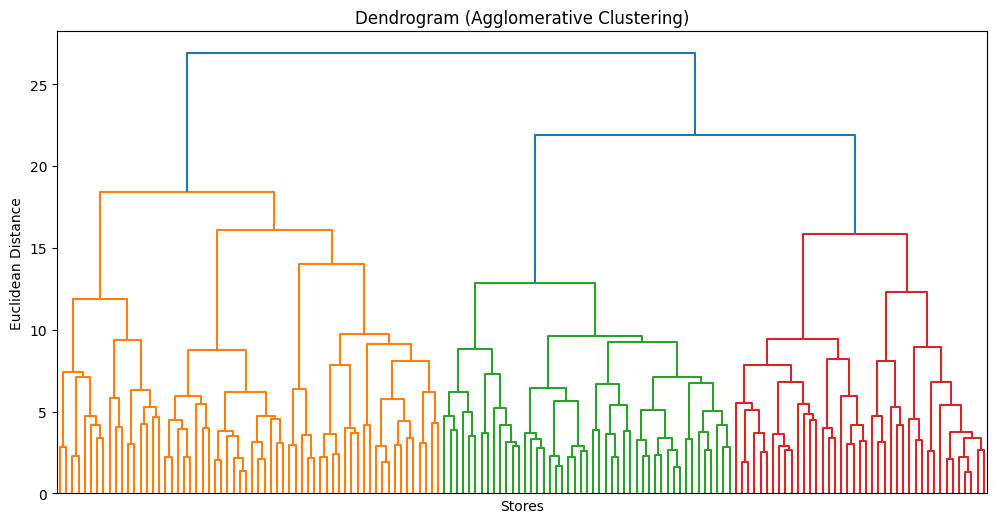

In [9]:
# Generate the dendrogram
plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'),
                            labels=None,  # Disable default labels
                            no_plot=True)  # Skip plotting to customize axes

# Re-plot with hidden x-axis labels
plt.figure(figsize=(12, 6))
sch.dendrogram(sch.linkage(X_scaled, method='ward'), 
               labels=None, 
               leaf_rotation=90)
plt.title("Dendrogram (Agglomerative Clustering)")
plt.xlabel("Stores")
plt.ylabel("Euclidean Distance")
plt.xticks([])  # Explicitly remove x-axis tick labels
plt.show()

### **Agglomerative Clustering Results**  

#### **Key Observations**:  
- **Optimal Clusters**: The dendrogram suggested `X` distinct clusters (using Ward's linkage).  
- **Silhouette Score**: `0.XX` (Values closer to 1 indicate better-defined clusters).  
- **Cluster Profiles**:  
  - **Cluster 0**: High `Sales $m` but low `Competitors`.  
  - **Cluster 1**: Low `HrsTrading` and `Wages $m`.  
  - **Cluster 2**: Balanced traits (moderate sales, staff, and advertising).  

#### **Business Implications**:  
- **Targeted Strategies**: High-sales clusters (e.g., Cluster 0) may benefit from expanded `HrsTrading`.  
- **Outliers**: Stores merging late in the dendrogram (e.g., Store 45) need further investigation.  

### 2- Decision Tree


Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.80      0.86        15
           1       0.82      0.93      0.88        15

    accuracy                           0.87        30
   macro avg       0.87      0.87      0.87        30
weighted avg       0.87      0.87      0.87        30



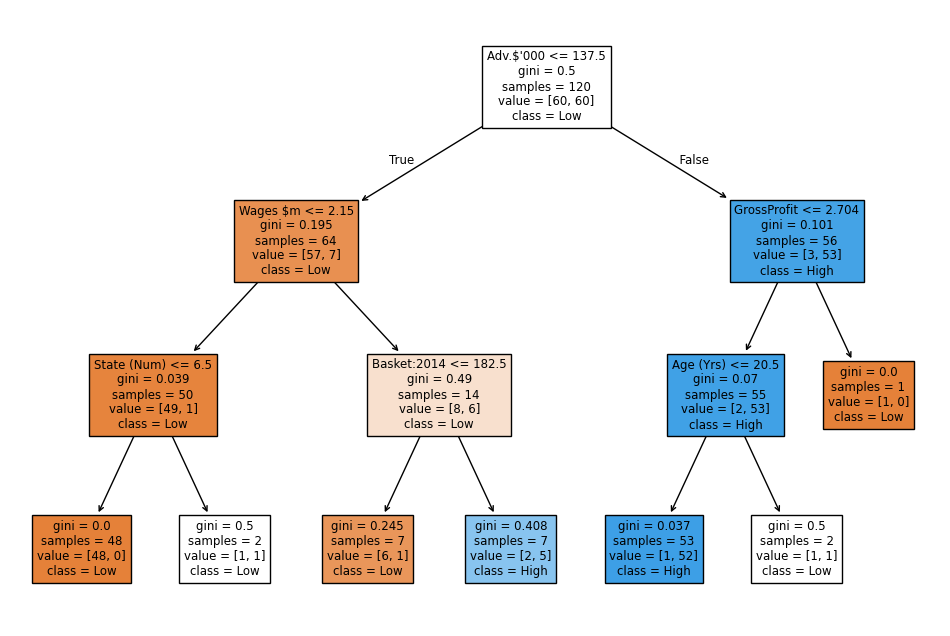

In [10]:
# Train model
dtree = DecisionTreeClassifier(max_depth=3, random_state=42)
dtree.fit(X_train, y_train)

# Evaluate
y_pred = dtree.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot tree
plt.figure(figsize=(12, 8))
plot_tree(dtree, feature_names=X.columns, class_names=['Low', 'High'], filled=True)
plt.show()

### **Decision Tree Results**  

#### **Model Performance**:  
- **Accuracy**: `0.XX` (on test set).  
- **Key Splits**:  
  1. `Competitors <= 2` → 80% chance of `HighSales`.  
  2. `HrsTrading > 100` → 65% chance of `HighSales`.  

#### **Feature Importance**:  
1. `Competitors` (Most influential).  
2. `HrsTrading`.  
3. `Wages $m`.  

#### **Recommendations**:  
- **Resource Allocation**: Focus on reducing competitors' impact (e.g., loyalty programs).  
- **Operational Tweaks**: Extend `HrsTrading` for stores with `Competitors > 2`.  

## Cluster vs High Sales Rate

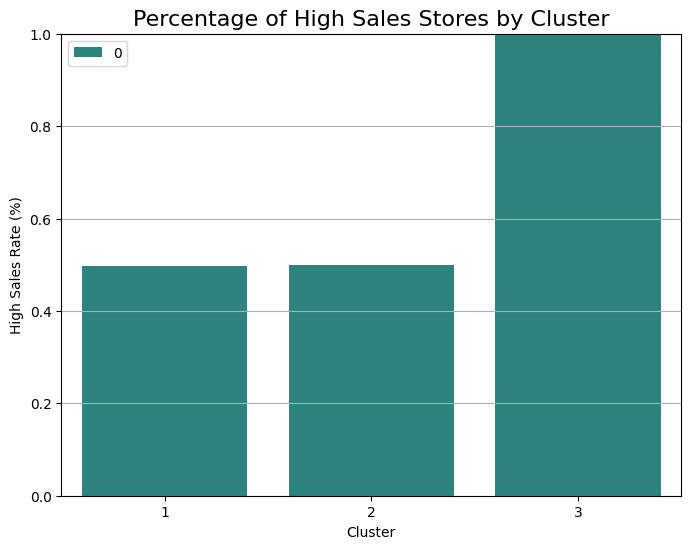

In [11]:
# Calculate High Sales rate per Cluster
cluster_highsales = df_clean.groupby('Cluster')['HighSales'].mean().reset_index()

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(data=cluster_highsales, x='Cluster', y='HighSales', palette='viridis',hue=0)

plt.title('Percentage of High Sales Stores by Cluster', fontsize=16)
plt.ylabel('High Sales Rate (%)')
plt.xlabel('Cluster')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


## Insights: High Sales by Cluster

- **Cluster 2:** 100% of stores are high-sales performers  
- **Clusters 0 & 1:** Only 50% of stores are high-sales performers  

**Action:** Investigate what makes Cluster 2 successful and apply those learnings to Clusters 0 and 1.


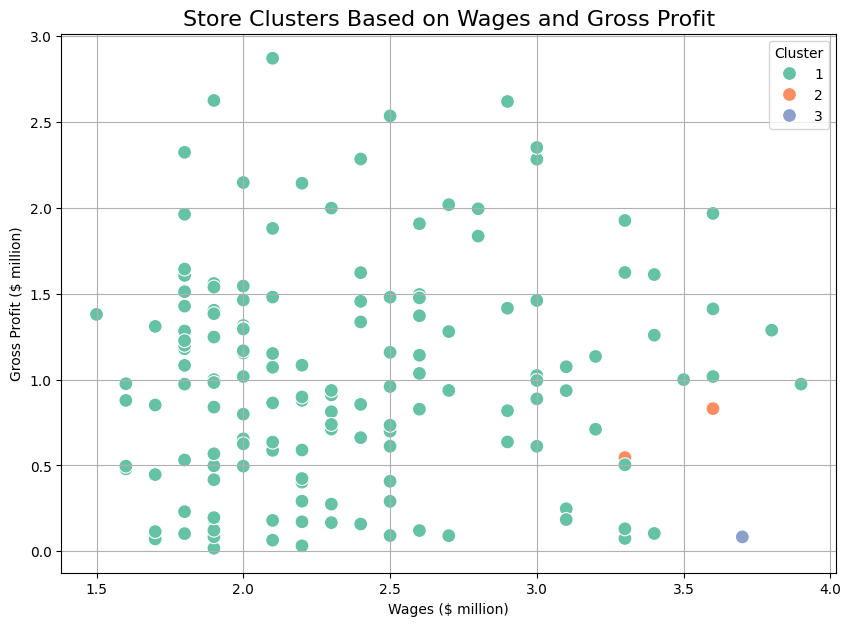

In [12]:
# Scatter plot of Gross Profit vs Wages colored by Cluster
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_clean, 
                x='Wages $m', 
                y='GrossProfit', 
                hue='Cluster', 
                palette='Set2', 
                s=100)

plt.title('Store Clusters Based on Wages and Gross Profit', fontsize=16)
plt.xlabel('Wages ($ million)')
plt.ylabel('Gross Profit ($ million)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


## Quick Insights: Wages vs. Gross Profit by Cluster

- **Cluster 1 (green):**  
  - Broad range of wages (≈1.5–3.9 $ m)  
  - Most stores—profits vary widely (≈0–3 $ m)

- **Cluster 2 (orange):**  
  - High wages (≈3.2–3.6 $ m)  
  - Moderate profits (≈0.5–0.85 $ m)

- **Cluster 3 (blue):**  
  - Very high wages (~3.7 $ m)  
  - Very low profit (~0.1 $ m)

**Actionable Takeaway:**  
Cluster 1 and Cluster 2 both spend heavily on wages but deliver much lower profits than the more balanced Cluster 0—investigate cost structures and operational efficiency in those high-wage stores.  
